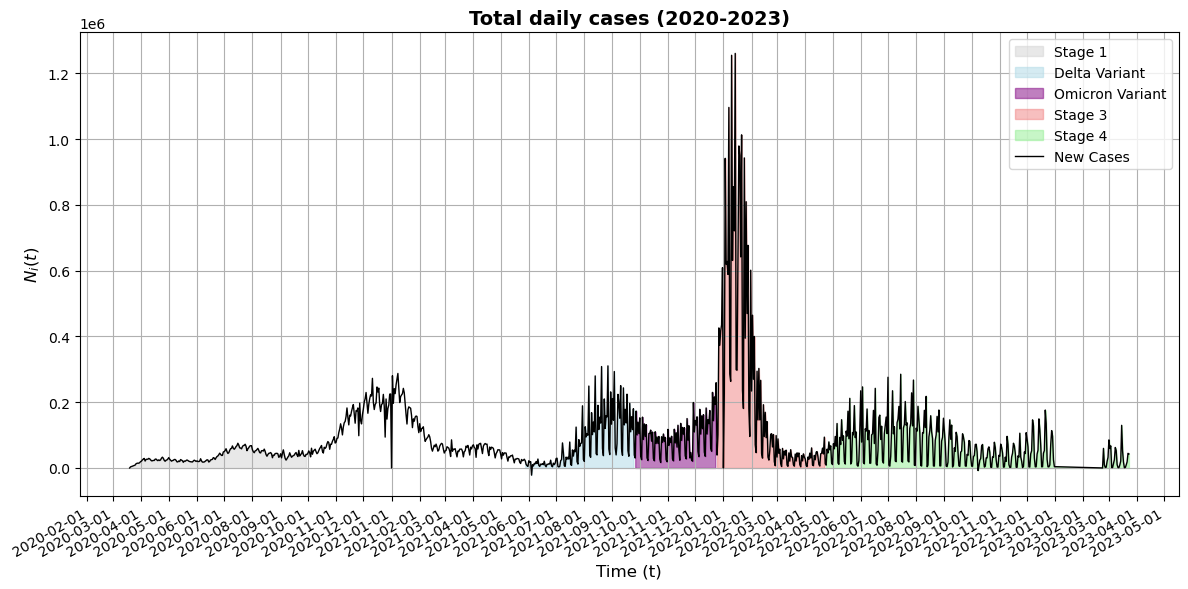

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Function to load and group data
def load_and_group_data(file_path):
    df = pd.read_csv(file_path)
    df['date'] = pd.to_datetime(df['date'])
    return df.groupby('date')['new_cases'].sum().reset_index()

# Upload and group CSV files
df1_grouped = load_and_group_data('/Users/gianmarcoferrara/ComplexNetworksProject/new_daily_2020.csv')
df2_grouped = load_and_group_data('/Users/gianmarcoferrara/ComplexNetworksProject/new_daily_2021.csv')
df3_grouped = load_and_group_data('/Users/gianmarcoferrara/ComplexNetworksProject/new_daily_2022.csv')
df4_grouped = load_and_group_data('/Users/gianmarcoferrara/ComplexNetworksProject/new_daily_2023.csv')

# Combine datasets
df_combined = pd.concat([df1_grouped, df2_grouped, df3_grouped, df4_grouped])

# Final grouping by date
df_final = df_combined.groupby('date')['new_cases'].sum().reset_index()

# Initialize the plot
plt.figure(figsize=(12, 6))

# Add different colored sections
# Stage 1
plt.fill_between(df_final['date'], 0, df_final['new_cases'], 
                 where=(df_final['date'] < '2020-09-30'), 
                 color='lightgrey', alpha=0.5, label='Stage 1')

# Delta Variant 
plt.fill_between(df_final['date'], 0, df_final['new_cases'], 
                 where=(df_final['date'] >= '2021-05-28') & (df_final['date'] < '2021-09-25'), 
                 color='lightblue', alpha=0.5, label='Delta Variant')

# Omicron Variant
plt.fill_between(df_final['date'], 0, df_final['new_cases'], 
                 where=(df_final['date'] >= '2021-09-26') & (df_final['date'] < '2021-12-24'), 
                 color='purple', alpha=0.5, label='Omicron Variant')

# Stage 3
plt.fill_between(df_final['date'], 0, df_final['new_cases'], 
                 where=(df_final['date'] >= '2021-12-25') & (df_final['date'] < '2022-04-23'), 
                 color='lightcoral', alpha=0.5, label='Stage 3')

# Stage 4
plt.fill_between(df_final['date'], 0, df_final['new_cases'], 
                 where=(df_final['date'] >= '2022-04-24'), color='lightgreen', alpha=0.5, label='Stage 4')

# Add the main line
plt.plot(df_final['date'], df_final['new_cases'], color='black', linewidth=1, label='New Cases')

# Axis formatting
plt.xlabel('Time (t)', fontsize=12)
plt.ylabel('$N_{i}(t)$', fontsize=12)
plt.title('Total daily cases (2020-2023)', fontsize=14, fontweight='bold')

# Improve date readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()